In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [2]:
# 2. Load Excel Dataset

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('Uploaded file: "{name}" ' .format(name=fn))

Saving wholesale_retail_dataset_modified1.xlsx to wholesale_retail_dataset_modified1.xlsx
Uploaded file: "wholesale_retail_dataset_modified1.xlsx" 


# Data Overview

* This dataset is a collection of transactions from an unspecified retailer. It contains thousands of online eCommerce orders focusing on specific products and volume ordered.  Each transaction contains a minimum of one product ID. The data is summmerized by the following:  
customer membership status, order date, date of delivery, product ID, quantity ordered, transaction total, and cost per unit. "Product volume and Total Product Revenue" has been added for evaluation.  

* The dataset chosen has been cleaned and normalized for evaluation.  The selected target variable is "Product Volume" as it is a continuous variable.  This variable can be used to predict the volume of future sales for specific products.  

In [3]:
# 2a.  Display data

file_path = next(iter(uploaded))
data = pd.read_excel(file_path)
display(data.head())

,Customer ID,Customer Status,Date of Order,Delivery Date,Order ID,Product ID,Qty Ordered,Total Retail Price,Cost Per Unit,Product Volume,Total Volume Product Revenue
0,579,Silver,2017-01-01,2017-01-07,123002578,220101400106,2,92.6,20.70,35,724.50
1,7574,SILVER,2017-01-01,2017-01-05,123004074,210201000009,1,21.7,9.95,57,567.15
2,28861,Gold,2017-01-01,2017-01-04,123000871,230100500068,1,1.7,0.80,162,129.60
3,43796,Gold,2017-01-01,2017-01-06,123002851,220100100633,1,47.9,24.05,97,2332.85
4,54673,Gold,2017-01-01,2017-01-04,123003607,220200200043,1,36.9,18.30,128,2342.40


In [4]:
# 2b. Data Info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135599 entries, 0 to 135598
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Customer ID                   135599 non-null  int64         
 1   Customer Status               135599 non-null  object        
 2   Date of Order                 135599 non-null  datetime64[ns]
 3   Delivery Date                 135599 non-null  datetime64[ns]
 4   Order ID                      135599 non-null  int64         
 5   Product ID                    135599 non-null  int64         
 6   Qty Ordered                   135599 non-null  int64         
 7   Total Retail Price            135599 non-null  float64       
 8   Cost Per Unit                 135599 non-null  float64       
 9   Product Volume                135599 non-null  int64         
 10  Total Volume Product Revenue  135599 non-null  float64       
dtypes: datetime64

In [5]:
# 2c. Data Stats

data.describe()

,Customer ID,Date of Order,Delivery Date,Order ID,Product ID,Qty Ordered,Total Retail Price,Cost Per Unit,Product Volume,Total Volume Product Revenue
count,135599.000000,135599,135599,1.355990e+05,1.355990e+05,135599.000000,135599.000000,135599.000000,135599.000000,135599.000000
mean,45147.330607,2019-01-02 02:26:52.737557248,2019-01-03 04:04:51.931356416,1.235005e+08,2.289286e+11,1.664710,138.081958,38.625201,177.064012,7977.471727
min,1.000000,2017-01-01 00:00:00,2017-01-02 00:00:00,1.230000e+08,2.102001e+11,1.000000,0.625000,0.200000,1.000000,1.350000
25%,21995.000000,2018-02-16 00:00:00,2018-02-17 00:00:00,1.232309e+08,2.201014e+11,1.000000,39.500000,13.150000,58.000000,1046.000000
50%,43778.000000,2019-02-01 00:00:00,2019-02-02 00:00:00,1.234789e+08,2.301005e+11,1.000000,83.900000,25.250000,106.000000,2895.750000
75%,65700.000000,2019-11-22 00:00:00,2019-11-23 00:00:00,1.237681e+08,2.402001e+11,2.000000,170.200000,49.400000,213.000000,7808.250000
max,94253.000000,2020-11-10 00:00:00,2020-11-14 00:00:00,1.241000e+08,2.408002e+11,9.000000,6257.200000,776.300000,1248.000000,192432.000000
std,27152.196393,NaN,NaN,3.080729e+05,1.063355e+10,0.891498,181.228115,41.691397,194.672705,18003.765036


## Select Features and Target

In [6]:
# 3. Select Features and Target

# dependent variable (y) is Product Volume
# independend variable (x) is Qty Ordered, Cost per Unit, Total Volume Product Revenue

X = data.drop(columns=["Product Volume", "Customer Status", "Product ID", "Date of Order", "Delivery Date", "Total Retail Price", "Customer ID", "Order ID"])
y = data["Product Volume"]

## Train‑Test Split

In [7]:
# 4. Train‑Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
# 5. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# 6. Fit and Train Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [10]:
# 6a. Report Coefficients and Intercept

print("Intercept:", lr_model.intercept_)
print("Coefficients: ", lr_model.coef_)
for feature, coef in zip(X.columns, lr_model.coef_):
    print(f"{feature}: ({'Positive' if coef > 0 else 'Negative'})")

Intercept: 176.92620691562422
Coefficients:  [ -0.67112021 -73.2886605  166.04980477]
Qty Ordered: (Negative)
Cost Per Unit: (Negative)
Total Volume Product Revenue: (Positive)


# Coefficients:

* The intercept is the predicted target variable when all features are at zero and the regression line crosses the y-axis. This tells us that the predicted "Product Volume" is approximately 176.93.
* Each coefficient represents the estimated change in the target variable.
* As the feature increases, a positive coefficient indicates the predicted target variable tends to increase while a negative coefficient indicates that it tends to decrease.

In [11]:
# 7. Make predictions on the test set
y_pred = lr_model.predict(X_test_scaled)

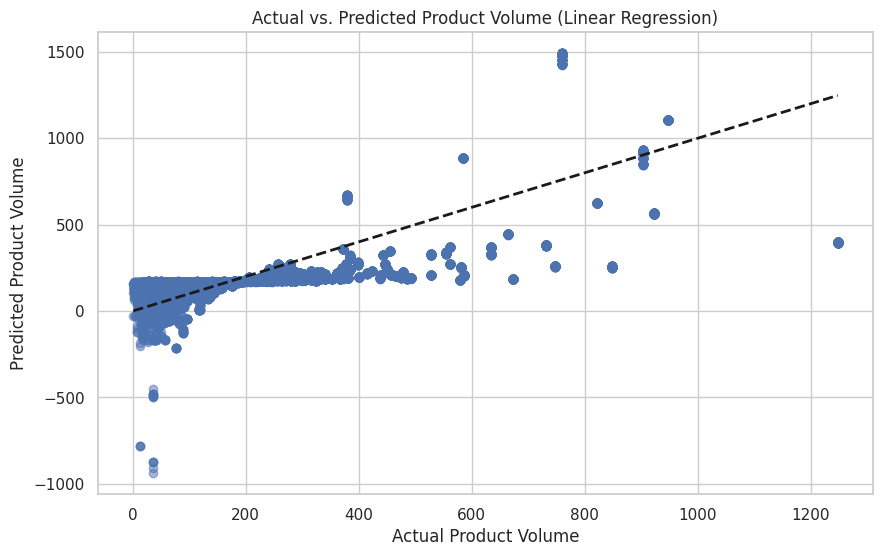

In [12]:
# 8. Visualize Actual vs. Predicted Values

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Product Volume")
plt.ylabel("Predicted Product Volume")
plt.title("Actual vs. Predicted Product Volume (Linear Regression)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.grid(True)
plt.show()

# Evaluate the MSE

In [13]:
# 9. Compute Mean Squared Error for Linear Regression

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Linear Regression): {mse:.4f}")

Mean Squared Error (Linear Regression): 20100.8950


In [14]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)



Tune the max_depth hyperparameter of the DecisionTreeRegressor model.


In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 5, 7, 10]}
grid_search = GridSearchCV(dt_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [3, 5, 7, 10]})

## Make predictions


In [16]:
# Make Predictions on the test set

y_pred_dt = grid_search.predict(X_test_scaled)

## Visualize predictions



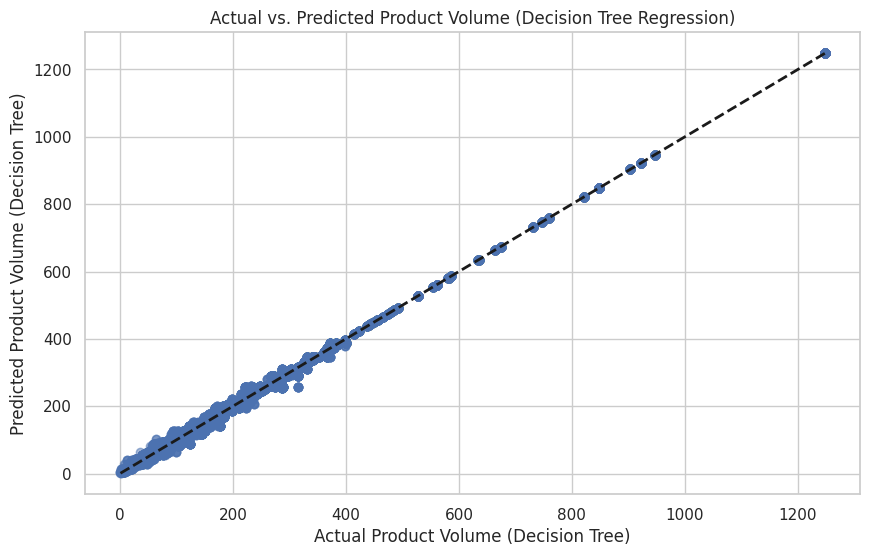

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.xlabel("Actual Product Volume (Decision Tree)")
plt.ylabel("Predicted Product Volume (Decision Tree)")
plt.title("Actual vs. Predicted Product Volume (Decision Tree Regression)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.grid(True)
plt.show()

## Evaluate decision tree regressor


In [18]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Mean Squared Error (Decision Tree): {mse_dt:.4f}")

Mean Squared Error (Decision Tree): 52.1819


## Compare models

### MSE performance:
* When comparing both model's MSE, the Decision Tree model performed significantly better than the Linear Regression model.  A smaller MSE means that the difference between the actual target vs predicted target is much more accurate for this dataset.    


In [19]:
print("Mean Squared Error (Linear Regression):", mse)
print("Mean Squared Error (Decision Tree):", mse_dt)


Mean Squared Error (Linear Regression): 20100.895031626387
Mean Squared Error (Decision Tree): 52.181923067786585


#Random Forest Regressor



In [20]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [21]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

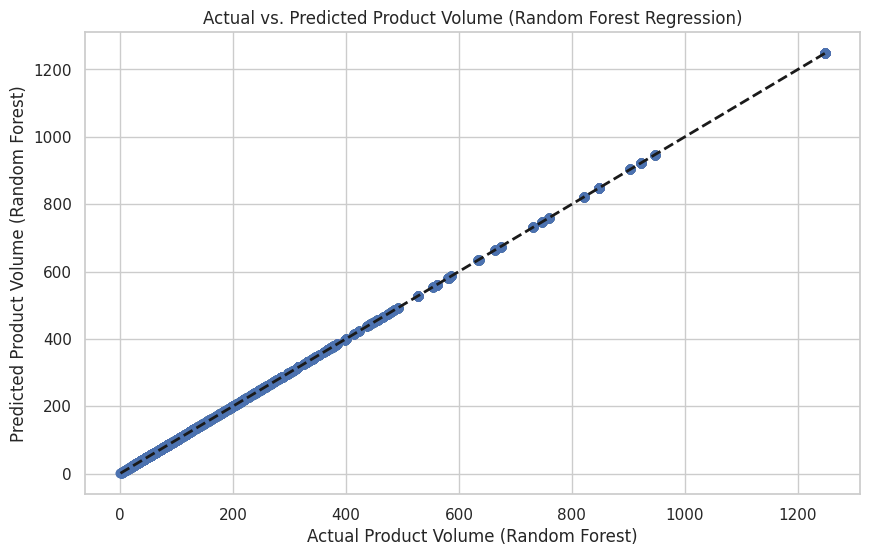

In [22]:
# Visualize Actual vs. Predicted Values (Random Forest)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Product Volume (Random Forest)")
plt.ylabel("Predicted Product Volume (Random Forest)")
plt.title("Actual vs. Predicted Product Volume (Random Forest Regression)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.grid(True)
plt.show()

In [23]:
# Compute Mean Squared Error for Random Forest Regressor

mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error (Random Forest): {mse_rf:.4f}")

Mean Squared Error (Random Forest): 0.0031


# Evaluation

The random forest regressor had a much higher accuracy rate than the other two models.  The MSE is much smaller compared to the other models.  The random forest regressor takes multiple predictions from the decison tree and can easily handle noisy or outlier data.  

# Final Reflection


* Linear Models might be preferred over decison tree models when the dataset is large, but has a small number of features.  This can help us understand the strength and the direction of relationships in order to comprehend WHY the prediction was made.

* Decision tree models might be preferred when there are large number of features with a mix of numerical and categorial features.  They also handle missing data or outliers much more efficiently. In our case, the Random Forest Regressor is the better choice for accuracy and precision.